# Representación con atributos (características) cruzados
---

# Importamos los módulos y las sentencias necesarias

In [1]:
#@title Cárgamos las importaciones

import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers

from matplotlib import pyplot as plt

# Las siguientes líneas ajustan la granularidad de del "reporting"
pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.1f}".format

tf.keras.backend.set_floatx('float32')

print("Módulos importados.")

Módulos importados.


# Carga, escalado y mezcla de las muestras

Cargamos los .csv separados de dos DataFrame de pandas:

  - train_df
  - test_df

Después, escalamos `median_house_value` a un rango más amigable y mezclamos los ejemplos.

In [2]:
# Carga de los DataFrames
train_df = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv")
test_df = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_test.csv")

# Escalamos las etiquetas
scale_factor = 1000.0
# Escalamos la etiqueta del conjunto de datos de entrenamiento.
train_df["median_house_value"] /= scale_factor

# Escalamos la etiqueta del conjunto de datos de testeo.
test_df["median_house_value"] /= scale_factor

# (Shuffle) Mezclamos las muestras
train_df = train_df.reindex(np.random.permutation(train_df.index))

# Representamos `latitude`y `longitude` como valores de punto flotante

Colabs anteriores entrenaron en una sola función o una sola función sintética. Por el contrario, este ejercicio se entrena en dos entidades mediante **capas de entrada**.

La ubicación de un vecindario suele ser la característica más importante para determinar el valor de una casa. El conjunto de datos de Vivienda de California proporciona dos características, `latitude` y `longitud` que identifican la ubicación de cada vecindario.

La siguiente celda de código define dos capas `tf.keras.Input`, una para representar la `latitude` y otra para representar la `longitud`, ambas como valores de punto flotante.

Esta celda de código especifica las características en las que finalmente entrenará el modelo y cómo se representará cada una de esas características.

In [3]:
# El tensor decimal Keras Input (de entrada).
inputs = {
    "latitude":
        tf.keras.layers.Input(shape = (1,), dtype = tf.float32,
                              name = "latitude"),
    "longitude":
        tf.keras.layers.Input(shape = (1,), dtype = tf.float32,
                              name = "longitude")
}

# Definimos funciones para crear y entrenar el modelo, y para representarlo (plotearlo)

  - `create_model`, quien le dice a TensorFlow que construya un modelo de regresión lineal.
  - `train_model`, quien entrenará el modelo.
  - `plot_the_loss_curve`, quien genera la curva de pérdida.

In [4]:
#@title Defeninmos las funciones para construir y entrenar el modelo, y de ploteo
def create_model(my_inputs, my_outputs, my_learning_rate):

  model = tf.keras.Model(inputs=my_inputs, outputs=my_outputs)

  # Construimos las capas dentro del modelo que TensorFlow puede ejecutar
  model.compile(optimizer=tf.keras.optimizers.experimental.RMSprop(
      learning_rate=my_learning_rate),
      loss="mean_squared_error",
      metrics=[tf.keras.metrics.RootMeanSquaredError()])

  return model


def train_model(model, dataset, epochs, batch_size, label_name):
  """Alimentar el modelo con un dataset para que entrene el modelo."""

  features = {name:np.array(value) for name, value in dataset.items()}
  label = np.array(features.pop(label_name))
  history = model.fit(x=features, y=label, batch_size=batch_size,
                      epochs=epochs, shuffle=True)

  # La lista de epochs es almacenada de manera independiente del resto del historial.
  epochs = history.epoch

  # Isolamos el error cuadrático medio absoluto para cada epoch.
  hist = pd.DataFrame(history.history)
  rmse = hist["root_mean_squared_error"]

  return epochs, rmse


def plot_the_loss_curve(epochs, rmse):
  """Ploteamos la curva de la pérdida vs. epochs."""

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Root Mean Squared Error")

  plt.plot(epochs, rmse, label="Loss")
  plt.legend()
  plt.ylim([rmse.min()*0.94, rmse.max()*1.05])
  plt.show()


print("Funciones create_model, train_model y plot_the_loss_curve definidas.")

Funciones create_model, train_model y plot_the_loss_curve definidas.


# El modelo con las representaciones de punto plotante

Llamamos a las funciones.

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/engine/functional.py:639: UserWarning: Input dict contained keys ['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income'] which did not match any model input. They will be ignored by the model.
  inputs = self._flatten_to_reference_inputs(inputs)


170/170 [==============================] - 1s 2ms/step - loss: 13833.2568 - root_mean_squared_error: 117.6149
Epoch 2/30
170/170 [==============================] - 0s 2ms/step - loss: 13433.7109 - root_mean_squared_error: 115.9039
Epoch 3/30
170/170 [==============================] - 0s 2ms/step - loss: 13375.1465 - root_mean_squared_error: 115.6510
Epoch 4/30
170/170 [==============================] - 0s 2ms/step - loss: 13326.9531 - root_mean_squared_error: 115.4424
Epoch 5/30
170/170 [==============================] - 0s 2ms/step - loss: 13291.7207 - root_mean_squared_error: 115.2897
Epoch 6/30
170/170 [==============================] - 0s 2ms/step - loss: 13256.6455 - root_mean_squared_error: 115.1375
Epoch 7/30
170/170 [==============================] - 0s 2ms/step - loss: 13234.6475 - root_mean_squared_error: 115.0419
Epoch 8/30
170/170 [==============================] - 1s 3ms/step - loss: 13194.1719 - root_mean_squared_error: 114.8659
Epoch 9/30
170/170 [=======================

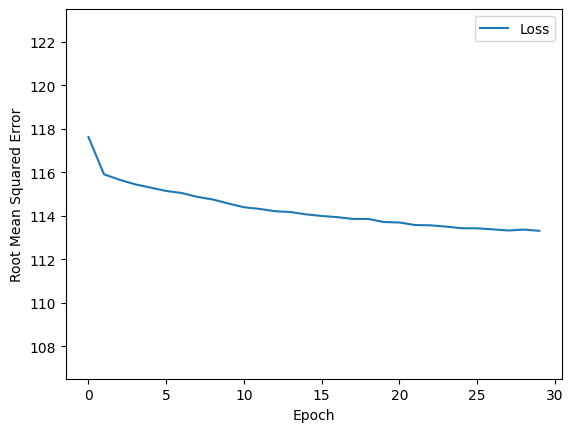


: Evaluate the new model against the test set:
 1/30 [>.............................] - ETA: 6s - loss: 8289.4932 - root_mean_squared_error: 91.0467

/usr/local/lib/python3.10/dist-packages/keras/engine/functional.py:639: UserWarning: Input dict contained keys ['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income'] which did not match any model input. They will be ignored by the model.
  inputs = self._flatten_to_reference_inputs(inputs)


30/30 [==============================] - 0s 7ms/step - loss: 12279.3975 - root_mean_squared_error: 110.8124


[12279.3974609375, 110.81243896484375]

In [5]:
# Hiperparámetros
learning_rate = 0.05
epochs = 30
batch_size = 100
label_name = "median_house_value"

# Las dos capas de entrada son concatenadas para que puedan ser pasadas
# como un único tensor a una capa Dense.
preprocessing_layer = tf.keras.layers.Concatenate()(inputs.values())

dense_output = layers.Dense(
    units=1,
    input_shape=(1,),
    name="dense_layer")(preprocessing_layer)

outputs = {
    'dense_output': dense_output
}

# Crear y compilar la topografía del modelo.
my_model = create_model(inputs, outputs, learning_rate)

# To view a PNG of this model's layers, uncomment the call to
# `tf.keras.utils.plot_model` below. After running this code cell, click
# the file folder on the left, then the `my_model.png` file.
# tf.keras.utils.plot_model(my_model, "my_model.png", show_shapes=True)

# Entrenar el modelo en el conjunto de entrenamiento.
epochs, rmse = train_model(my_model, train_df, epochs, batch_size, label_name)

# Imprimir el resumen del modelo.
my_model.summary(expand_nested=True)

plot_the_loss_curve(epochs, rmse)

print("\n: Evaluate the new model against the test set:")
test_features = {name:np.array(value) for name, value in test_df.items()}
test_label = np.array(test_features.pop(label_name))
my_model.evaluate(x=test_features, y=test_label, batch_size=batch_size)

# TAREA 1: ¿Por qué los valores de punto flotante no son una buena manera de representar `latitude` y `longitude`?

¿Son los valores de punto flotante una buena forma de representar la `latitud` y la `longitud`?

In [6]:
#@title Respuesta:

# No. Representar latitud y longitud como valores de punto flotante
# no tiene mucho poder predictivo. Por ejemplo, los barrios de
# latitud 35 no son los vecindarios en la latitud 35 no son 36/35
# más valiosos (o 35/36 menos valiosos) que las casas en la latitud 36.

# Representar "latitud" y "longitud" como valores de punto flotante
# casi no proporciona poder predictivo. Solo estamos usando los valores
# sin procesar para establecer una línea de base para futuros experimentos
# con mejores representaciones.

# Representar latitud y longitud en cubos/contenedores

La siguiente celda de código representa la latitud y la longitud en cubos o contenedores (bins). Cada contenedor representa todos los vecindarios dentro de un solo grado. Por ejemplo, los vecindarios en la latitud 35,4 y 35,8 están en el mismo cubo, pero los vecindarios en la latitud 35,4 y 36,2 están en cubos diferentes.

El modelo aprenderá un peso separado para cada balde. Por ejemplo, el modelo aprenderá un peso para todos los vecindarios en el contenedor "35", un peso diferente para los vecindarios en el contenedor "36", y así sucesivamente. Esta representación creará aproximadamente 20 cubos:

  • 10 buckets (contenedores) para `latitude`.
  
  • 10 buckets (contenedores) para `longitude`.

In [7]:
resolution_in_degrees = 1.0

# Crear una lista de números represenstando las fronteras de los buckets
# (contenedores) para `latidude`.
latitude_boundaries = list(np.arange(int(min(train_df['latitude'])),
                                     int(max(train_df['latitude'])),
                                     resolution_in_degrees))
print("latitude boundaries: " + str(latitude_boundaries))

# Crear una discretización de capas para separar los datos de `latitude`
# en buckets (contenedores).
latitude = tf.keras.layers.Discretization(
    bin_boundaries=latitude_boundaries,
    name='discretization_latitude')(inputs.get('latitude'))

# El número de categorías es la longitud de latitude_boundaries + 1.
latitude = tf.keras.layers.CategoryEncoding(
    num_tokens=len(latitude_boundaries) + 1,
    output_mode='one_hot',
    name='categoru_encoding_latitude')(latitude)

# Crear una lista de números representando las fronteras de los
# buckets de `longitude`.
longitude_boundaries = list(np.arange(int(min(train_df['longitude'])),
                                      int(max(train_df['longitude'])),
                                      resolution_in_degrees))

print("longitude boundaries: " + str(longitude_boundaries))

# Crear una capa de discretización para separar los datos de `longitude`
# de los buckets.
longitude = tf.keras.layers.Discretization(
    bin_boundaries=longitude_boundaries,
    name='discretization_lingitude')(inputs.get('longitude'))

# El número de categorías es la longitud de longitude_boundaries + 1.
longitude = tf.keras.layers.CategoryEncoding(
    num_tokens=len(longitude_boundaries) + 1,
    output_mode='one_hot',
    name='category_encoding_longitude')(longitude)

# Concatenar `latitude` y `longitude` en un único tensor que sirva como
# input a la capa Dense.
concatenate_layer = tf.keras.layers.Concatenate()([latitude, longitude])

dense_output = layers.Dense(
    units=1, input_shape=(2,), name='dense_layer')(concatenate_layer)

# Definir un diccionario como output (salida) que enviaremos
# al modelo constructor.
outputs = {
    'dense_output': dense_output
}

latitude boundaries: [32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0]
longitude boundaries: [-124.0, -123.0, -122.0, -121.0, -120.0, -119.0, -118.0, -117.0, -116.0, -115.0]


# Entrenamos el modelo con la representación del los buckets

Ejecute la siguiente celda de código para entrenar el modelo con representaciones de "buckets" en lugar de representaciones de punto flotante:

Epoch 1/35
170/170 [==============================] - 1s 2ms/step - loss: 52140.4883 - root_mean_squared_error: 228.3429
Epoch 2/35
170/170 [==============================] - 0s 2ms/step - loss: 44737.8945 - root_mean_squared_error: 211.5133
Epoch 3/35
170/170 [==============================] - 1s 4ms/step - loss: 38148.2812 - root_mean_squared_error: 195.3159
Epoch 4/35
170/170 [==============================] - 1s 5ms/step - loss: 32350.9980 - root_mean_squared_error: 179.8638
Epoch 5/35
170/170 [==============================] - 1s 6ms/step - loss: 27308.7598 - root_mean_squared_error: 165.2536
Epoch 6/35
170/170 [==============================] - 1s 8ms/step - loss: 23045.8047 - root_mean_squared_error: 151.8084
Epoch 7/35
170/170 [==============================] - 1s 8ms/step - loss: 19553.9707 - root_mean_squared_error: 139.8355
Epoch 8/35
170/170 [==============================] - 1s 4ms/step - loss: 16720.0254 - root_mean_squared_error: 129.3059
Epoch 9/35
170/170 [============

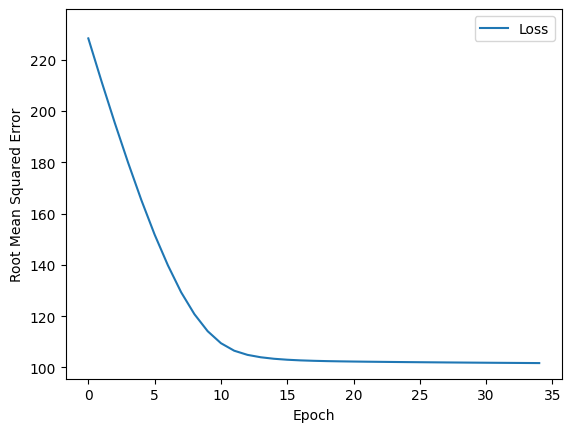


: Evaluar el nuevo modelo contra el conjunto de teste (test set):


/usr/local/lib/python3.10/dist-packages/keras/engine/functional.py:639: UserWarning: Input dict contained keys ['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income'] which did not match any model input. They will be ignored by the model.
  inputs = self._flatten_to_reference_inputs(inputs)


30/30 [==============================] - 1s 15ms/step - loss: 10199.1611 - root_mean_squared_error: 100.9909


[10199.1611328125, 100.99089813232422]

In [8]:
# Hiperparámetros
learning_rate = 0.04
epochs = 35

# Construir el modelo
my_model = create_model(inputs, outputs, learning_rate)

# Entrenar el modelo con el conjunto de entrenamiento.
epochs, rmse = train_model(my_model, train_df, epochs, batch_size, label_name)

# Imprimir el resumen del modelo.
my_model.summary(expand_nested=True)

plot_the_loss_curve(epochs, rmse)

print("\n: Evaluar el nuevo modelo contra el conjunto de teste (test set):")
my_model.evaluate(x=test_features, y=test_label, batch_size=batch_size)

## Tarea 2: ¿Los cubos superaron las representaciones de punto flotante?

Comparar los valores `root_mean_squared_error` del modelo para las dos representaciones (coma flotante frente a buckets(cubos)). ¿Qué modelo produjo menores pérdidas?

In [9]:
#@title Respuesta:.

# La representación de cubo superó a las representaciones
# de punto flotante. Sin embargo, todavía puedes hacerlo
# mucho mejor.

# Tarea 3: ¿Cuál es una mejor manera de representar la ubicación?

Los buckets (cubos) son una gran mejora con respecto a los valores de punto flotante. ¿Puedes identificar una forma aún mejor de identificar la ubicación con `latitude` y `longitude`?

In [10]:
#@title Respuesta:

# Representar la ubicación como un cruce de características
# debería producir mejores resultados.

# En la Tarea 2, representó la latitud en cubos unidimensionales
# y la longitud en otra serie de cubos unidimensionales.
# Sin embargo, las ubicaciones del mundo real existen en dos dimensiones.
# Por lo tanto, debe representar la ubicación como una cruz de características
# bidimensional. Es decir, cruzará los 10 cubos de latitud más o menos
# con los 10 cubos de longitud más o menos para crear una cuadrícula
# de 100 celdas.

# El modelo aprenderá pesos separados para cada una de las celdas.

# Representar la ubicación como un cruce de características

La siguiente celda de código representa la ubicación como una cruz de características. Es decir, la siguiente celda de código primero crea cubos y luego cruza las características de latitud y longitud usando una capa `HashedCrossing`.

In [11]:
resolution_in_degrees = 1.0

# Crear una lista de números para representar las fronteras
# de los buckets de `latitude`.
latitude_boundaries = list(np.arange(int(min(train_df['latitude'])),
                                     int(max(train_df['latitude'])),
                                     resolution_in_degrees))

# Crear una capa de Discretización para separar los datos
# de latitude en buckets (contenedores).
latitude = tf.keras.layers.Discretization(
    bin_boundaries=latitude_boundaries,
    name='dicretization_latitude')(inputs.get('latitude'))

# Crear una lista de números para representar las fronteras
# de los buckets de `longitude`.
longitude_boundaries = list(np.arange(int(min(train_df['longitude'])),
                                      int(max(train_df['longitude'])),
                                      resolution_in_degrees))

# Crear una capa de Discretización para separar los datos
# de longitude en buckets (contenedores).
longitude = tf.keras.layers.Discretization(
    bin_boundaries=longitude_boundaries,
    name='discretization_longitude')(inputs.get('longitude'))

# Cruzar las características de `latitude` y `longitude`
# en un one-hot vector.
feature_cross = tf.keras.layers.HashedCrossing(
    num_bins=len(latitude_boundaries) * len(longitude_boundaries),
    output_mode='one_hot',
    name='cross_latitude_longitude')([latitude, longitude])

dense_output = layers.Dense(units=1, input_shape=(2,),
                            name='dense_layer')(feature_cross)

# Definir un diccionario como output para mandarlo al constructor.
outputs = {
    'dense_output': dense_output
}

Epoch 1/35


/usr/local/lib/python3.10/dist-packages/keras/engine/functional.py:639: UserWarning: Input dict contained keys ['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income'] which did not match any model input. They will be ignored by the model.
  inputs = self._flatten_to_reference_inputs(inputs)


170/170 [==============================] - 2s 5ms/step - loss: 53526.8984 - root_mean_squared_error: 231.3588
Epoch 2/35
170/170 [==============================] - 1s 5ms/step - loss: 48506.1953 - root_mean_squared_error: 220.2412
Epoch 3/35
170/170 [==============================] - 1s 6ms/step - loss: 43838.2773 - root_mean_squared_error: 209.3759
Epoch 4/35
170/170 [==============================] - 0s 2ms/step - loss: 39473.3320 - root_mean_squared_error: 198.6790
Epoch 5/35
170/170 [==============================] - 0s 2ms/step - loss: 35460.7461 - root_mean_squared_error: 188.3102
Epoch 6/35
170/170 [==============================] - 0s 2ms/step - loss: 31787.8359 - root_mean_squared_error: 178.2914
Epoch 7/35
170/170 [==============================] - 0s 2ms/step - loss: 28428.4395 - root_mean_squared_error: 168.6073
Epoch 8/35
170/170 [==============================] - 0s 2ms/step - loss: 25400.1348 - root_mean_squared_error: 159.3742
Epoch 9/35
170/170 [=======================

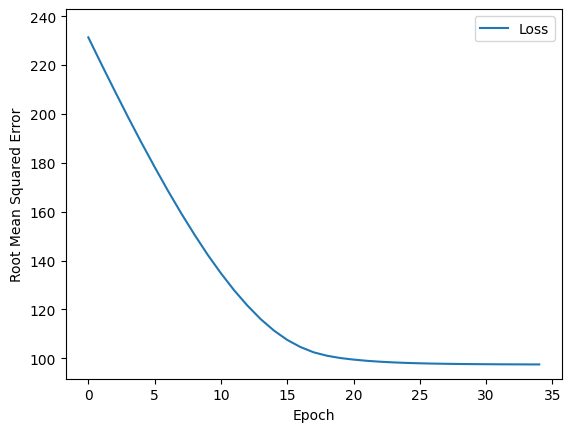


: Evaluar el modelo respecto al conjunto:
30/30 [==============================] - 0s 2ms/step - loss: 9320.4170 - root_mean_squared_error: 96.5423


/usr/local/lib/python3.10/dist-packages/keras/engine/functional.py:639: UserWarning: Input dict contained keys ['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income'] which did not match any model input. They will be ignored by the model.
  inputs = self._flatten_to_reference_inputs(inputs)


[9320.4169921875, 96.54230499267578]

In [13]:
# Hiperparámetros
learning_rate = 0.04
epochs = 35

# Construir el modelo, esta vez pasandole feature_corss_feature_layer
my_model = create_model(inputs, outputs, learning_rate)

# Entrenar el modelo con el conjunto de entrenamiento
epochs, rmse = train_model(my_model, train_df, epochs, batch_size, label_name)

# Imprimir el resumen del modelo.
my_model.summary(expand_nested=True)

plot_the_loss_curve(epochs, rmse)

print("\n: Evaluar el modelo respecto al conjunto:")
my_model.evaluate(x=test_features, y=test_label, batch_size=batch_size)

#TAREA 4: ¿La característica cruzada superó a los buckets (segmentos)?
¿Comparar los valores `root_mean_squared_error` del modelo para las dos representaciones (depósitos frente a cruce de características)? ¿Qué modelo produjo menores pérdidas?

In [ ]:
#@title Respues:

# Yes, representing these features as a feature cross produced
# much lower loss values than representing these features as buckets.

# TAREA 5: Ajusta la resolución del atributo cruzado.

Regrese a la celda de código en la sección "Representar la ubicación como una cruz de características". Tenga en cuenta que `resolución_en_grados` se establece en 1.0. Por lo tanto, cada celda representa un área de 1,0 grado de latitud por 1,0 grado de longitud, lo que corresponde a una celda de 110 km por 90 km. Esta resolución define un vecindario bastante grande.

Experimente con `resolución_en_grados` para responder las siguientes preguntas:

¿Qué valor de `resolución_en_grados` produce los mejores resultados (valor de pérdida más bajo)?
¿Por qué aumenta la pérdida cuando el valor de `resolución_en_grados` cae por debajo de cierto valor?
Finalmente responde la siguiente pregunta:

¿Qué característica (que no existe en el conjunto de datos de vivienda de California) sería un mejor indicador de ubicación que la latitud X longitud?

In [32]:
resolution_in_degrees = 0.4

# Crear una lista de números para representar las fronteras
# de los buckets de `latitude`.
latitude_boundaries = list(np.arange(int(min(train_df['latitude'])),
                                     int(max(train_df['latitude'])),
                                     resolution_in_degrees))

# Crear una capa de Discretización para separar los datos
# de latitude en buckets (contenedores).
latitude = tf.keras.layers.Discretization(
    bin_boundaries=latitude_boundaries,
    name='dicretization_latitude')(inputs.get('latitude'))

# Crear una lista de números para representar las fronteras
# de los buckets de `longitude`.
longitude_boundaries = list(np.arange(int(min(train_df['longitude'])),
                                      int(max(train_df['longitude'])),
                                      resolution_in_degrees))

# Crear una capa de Discretización para separar los datos
# de longitude en buckets (contenedores).
longitude = tf.keras.layers.Discretization(
    bin_boundaries=longitude_boundaries,
    name='discretization_longitude')(inputs.get('longitude'))

# Cruzar las características de `latitude` y `longitude`
# en un one-hot vector.
feature_cross = tf.keras.layers.HashedCrossing(
    num_bins=len(latitude_boundaries) * len(longitude_boundaries),
    output_mode='one_hot',
    name='cross_latitude_longitude')([latitude, longitude])

dense_output = layers.Dense(units=1, input_shape=(2,),
                            name='dense_layer')(feature_cross)

# Definir un diccionario como output para mandarlo al constructor.
outputs = {
    'dense_output': dense_output
}

Epoch 1/35


/usr/local/lib/python3.10/dist-packages/keras/engine/functional.py:639: UserWarning: Input dict contained keys ['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income'] which did not match any model input. They will be ignored by the model.
  inputs = self._flatten_to_reference_inputs(inputs)


170/170 [==============================] - 1s 2ms/step - loss: 53694.8789 - root_mean_squared_error: 231.7216
Epoch 2/35
170/170 [==============================] - 0s 3ms/step - loss: 48943.8594 - root_mean_squared_error: 221.2326
Epoch 3/35
170/170 [==============================] - 1s 4ms/step - loss: 44498.6406 - root_mean_squared_error: 210.9470
Epoch 4/35
170/170 [==============================] - 1s 3ms/step - loss: 40341.0352 - root_mean_squared_error: 200.8508
Epoch 5/35
170/170 [==============================] - 1s 3ms/step - loss: 36496.2695 - root_mean_squared_error: 191.0400
Epoch 6/35
170/170 [==============================] - 1s 3ms/step - loss: 32928.2383 - root_mean_squared_error: 181.4614
Epoch 7/35
170/170 [==============================] - 0s 3ms/step - loss: 29633.7324 - root_mean_squared_error: 172.1445
Epoch 8/35
170/170 [==============================] - 0s 2ms/step - loss: 26651.5605 - root_mean_squared_error: 163.2531
Epoch 9/35
170/170 [=======================

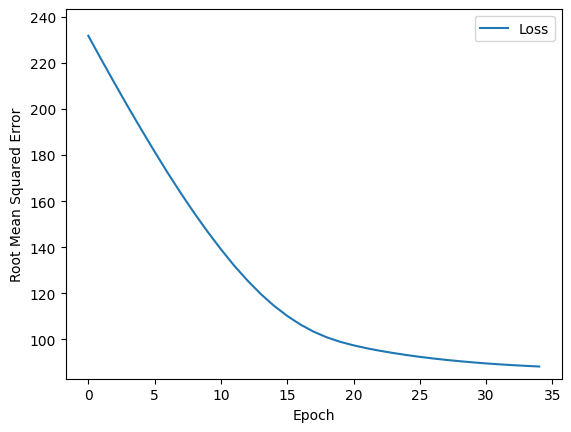


: Evaluar el modelo respecto al conjunto:
 1/30 [>.............................] - ETA: 6s - loss: 5081.4302 - root_mean_squared_error: 71.2841

/usr/local/lib/python3.10/dist-packages/keras/engine/functional.py:639: UserWarning: Input dict contained keys ['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income'] which did not match any model input. They will be ignored by the model.
  inputs = self._flatten_to_reference_inputs(inputs)


30/30 [==============================] - 0s 3ms/step - loss: 7853.7158 - root_mean_squared_error: 88.6212


[7853.7158203125, 88.6211929321289]

In [33]:
# Hiperparámetros
learning_rate = 0.04
epochs = 35

# Construir el modelo, esta vez pasandole feature_corss_feature_layer
my_model = create_model(inputs, outputs, learning_rate)

# Entrenar el modelo con el conjunto de entrenamiento
epochs, rmse = train_model(my_model, train_df, epochs, batch_size, label_name)

# Imprimir el resumen del modelo.
my_model.summary(expand_nested=True)

plot_the_loss_curve(epochs, rmse)

print("\n: Evaluar el modelo respecto al conjunto:")
my_model.evaluate(x=test_features, y=test_label, batch_size=batch_size)

In [ ]:
#@title Respuesta TAREA: 5.

#1. Una resolución de ~0,4 grados proporciona los mejores resultados.

#2. Por debajo de ~0,4 grados, la pérdida aumenta porque el conjunto
# de datos no contiene suficientes ejemplos en cada celda para predecir
# con precisión los precios de esas celdas.

#3. El código postal sería una característica mucho mejor que la
# latitud X longitud, suponiendo que el conjunto de datos contuviera
# suficientes ejemplos en cada código postal.: